# <span style = "color:red;">프로젝트가 미완성입니다. 제출기한 내에 완성하여 제출하지는 못했지만 -6/17까지 수정 업데이트해 나갈 예정입니다.</span>

# [AIFFEL_Going Deeper_5] 영화리뷰 텍스트 감성분석하기

## 프로젝트 내용    
네이버 영화리뷰 감성분석하기    

## 목차
#### <span style = "color:red;">1. 네이버 영화리뷰 감성분석 프로젝트</span>
**- Step 1. 필요한 라이브러리 불러오기**    
**- Step 2. 데이터 준비와 확인**




**- Step 3. 인물이 주인공이 아닌, 다른 대상에 대한 아웃포커싱 사진 만들기**                  
**- Step 4. 배경사진을 다른 이미지 합성_10번째 사진_동물 소 + 다른 배경 합치기**           
         
   
#### 2. 결론      
#### 3. 루브릭 관련 고려한 점     
#### 4. 회고          
#### 5. References         

## 글씨 색 표시
### <span style = "color:orange;">- 노랑: 질문! or 짚고가자!</span>    
### <span style = "color:red;">- 빨강: 중요 or 특이사항</span>

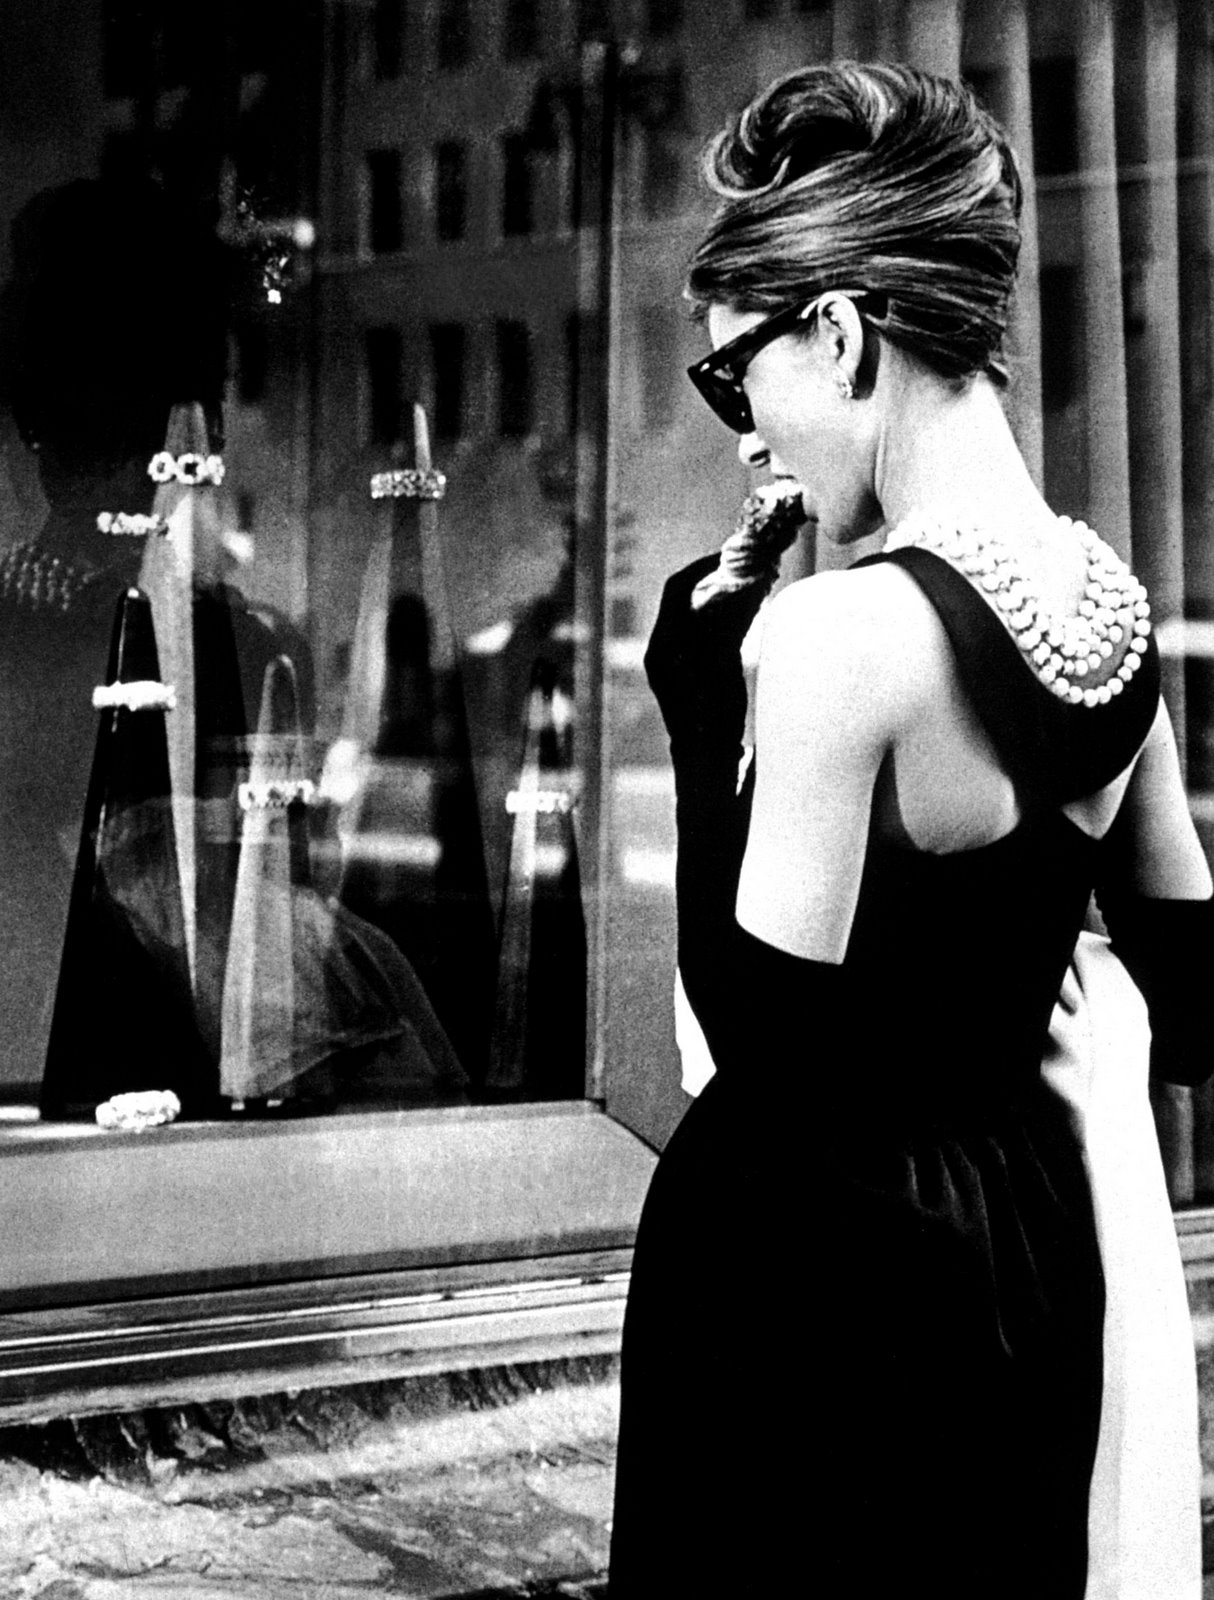

In [2]:
Image("[GD_5_Movie Review] images/breakfast_tiffanys_back.jpg")

# 1. 네이버 영화리뷰 감성분석 프로젝트

## Step 1. 필요한 라이브러리 불러오기

In [13]:
import pandas
import konlpy
import gensim
import pandas as pd
import numpy as np
import tensorflow as tf
import keras

from konlpy.tag import Mecab
from collections import Counter

print(pandas.__version__)
print(konlpy.__version__)
print(gensim.__version__)

1.3.3
0.5.2
4.1.2


### <span style = "color:orange;">라이브러리 공부!</span>
  
<span style = "color:red;">import konlpy</span>    
'코엔엘파이'라고 읽는다.     
한국어 정보처리를 위한 파이썬 패키지      
https://konlpy.org/ko/latest/index.html

<span style = "color:red;">import gensim</span>  
Gensim은 주제 모델링, 문서 유사성 분석 및 기타 자연어 처리 (NLP) 작업을 위해 설계된 오픈 소스 파이썬 라이브러리     
Gensim is a Python library for topic modelling(주제 모델링), document indexing and similarity retrieval with large corpora.      
Target audience is the natural language processing (NLP) and information retrieval (IR) community.       
*corpora: corpus의 복수     
https://pypi.org/project/gensim/



from konlpy.tag import Mecab
from collections import Counter

In [1]:
!pip install IPython  
from IPython.display import Image

## Step 2. 데이터 준비와 확인

In [8]:
# 데이터 불러오기(train, test 나누어)
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

In [9]:
# train_data 확인
train_data.head(20)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [10]:
# test_data 확인
test_data.tail(10)

,id,document,label
49990,9757200,제발 국뽕김치영화좀 그만 만들어라...,0
49991,9653062,재밌는데....?평점이왜?,1
49992,1077821,내일 토요일밤 MBC에서 영화 해준다.... 봐야지... 기대,1
49993,5494272,액션영화로 기대하지말고 스릴러영화라 생각하고 보면 괜찮은 영화인듯^^,1
49994,5567676,정말 너무 재밌음 ㅋ,1
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0
49999,6070594,마무리는 또 왜이래,0


In [18]:
print("훈련 샘플 개수: {}, 테스트 개수: {}".format(len(train_data), len(test_data)))

훈련 샘플 개수: 150000, 테스트 개수: 50000


In [11]:
# train_data의 전체 구조 파악
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


#### <span style = "color:red;">전체 150,000개의 데이터인데 document에 149,995개라고 나온다.</span>
5개는 결측치일까?

In [12]:
# test_data의 전체 구조 파악
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


#### <span style = "color:red;">test_data도 50,000개의 데이터 중 document는 49,997개이다.</span>
3개는 결측치일까?

## Step 3. 데이터로더 구성

In [ ]:
실습 때 다루었던 IMDB 데이터셋은 텍스트를 가공하여 imdb.data_loader() 메서드를 호출하면 
숫자 인덱스로 변환된 텍스트와 word_to_index 딕셔너리까지 친절하게 제공합니다. 

그러나 이번에 다루게 될 nsmc 데이터셋은 전혀 가공되지 않은 텍스트 파일로 이루어져 있습니다. 
이것을 읽어서 imdb.data_loader()와 동일하게 동작하는 자신만의 data_loader를 만들어 보는 것으로 시작합니다. 
data_loader 안에서는 다음을 수행해야 합니다.

In [ ]:
데이터의 중복 제거
NaN 결측치 제거
한국어 토크나이저로 토큰화
불용어(Stopwords) 제거
사전word_to_index 구성
텍스트 스트링을 사전 인덱스 스트링으로 변환
X_train, y_train, X_test, y_test, word_to_index 리턴

In [ ]:
tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(train_data, test_data, num_words=num_words):
    # [[YOUR CODE]]
    
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

In [ ]:
예시답안

In [28]:
# step 1_예시답안
from konlpy.tag import Mecab
import numpy as np
from collections import Counter

tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['', '', '', ''] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist] # 여기는 앞에서 했던 코드와 유사하다.
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
    
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data) 

# 공부해야할 것
1. konlpy가 무엇인지
2, from konlpy.tag import Mecab
3. from collections import Counter
4. 불용어
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'] 이게 불용어인가?
5. tokenizer.morphs





In [29]:
# step 2
# 출처 선배 깃헙
print(X_train[0])  # 1번째 리뷰데이터
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨
print('1번째 리뷰 문장 길이: ', len(X_train[0]))
print('2번째 리뷰 문장 길이: ', len(X_train[1]))

[32, 74, 919, 4, 4, 39, 228, 20, 33, 748]
라벨:  0
1번째 리뷰 문장 길이:  10
2번째 리뷰 문장 길이:  17


In [30]:
# step 3
# 출처 노드
index_to_word = {index:word for word, index in word_to_index.items()}

In [31]:
# step 4
# 출처 선배 깃헙
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

index_to_word[0] = "<PAD>"
index_to_word[1] = "<BOS>"
index_to_word[2] = "<UNK>"
index_to_word[3] = "<UNUSED>"

index_to_word = {index:word for word, index in word_to_index.items()}

print(index_to_word[1])    
print(word_to_index['<PAD>'])
print(index_to_word[0])    

<BOS>
0
<PAD>


In [7]:
# step 5
# 출처 노드

# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다. 
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [32]:
# step 6
# 출처 선배 깃헙

# 정상적으로 decode되는지 확인해 보겠습니다.

print(get_decoded_sentence(X_train[0], index_to_word))
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨

더 빙 . . 진짜 짜증 나 네요 목소리
라벨:  0


In [33]:
# step 7
# 출처 선배 깃헙
total_data_text = list(X_train) + list(X_test)

# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 지정 
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  15.96940191154864
문장길이 최대 :  116
문장길이 표준편차 :  12.843571191092
pad_sequences maxlen :  41
전체 문장의 0.9342988343341575%가 maxlen 설정값 이내에 포함됩니다. 


In [34]:
# step 8
# 출처 선배 깃헙
X_train = keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index['<PAD>'],
                                                        padding='pre',
                                                        maxlen=maxlen)

X_test = keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index['<PAD>'],
                                                       padding='pre',
                                                       maxlen=maxlen)

print(X_train.shape)
print(X_test.shape)

(146182, 41)
(49157, 41)


In [35]:
# step 9 - 여기에서 부터는 4. 모델 구성을 위한 데이터 분석 및 가공에 들어가도 괜찮을 것 같아
# 출처 선배 깃헙

# validation 30000 분리

X_val = X_train[:10000]   
y_val = y_train[:10000]

partial_X_train = X_train[10000:]  
partial_y_train = y_train[10000:]

print(partial_X_train.shape)
print(partial_y_train.shape)

(136182, 41)
(136182,)


In [36]:
# 출처 선배 깃헙

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 32  # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)

print('done')

done


# 4. 모델 구성을 위한 데이터 분석 및 가공

In [ ]:
데이터셋 내 문장 길이 분포
적절한 최대 문장 길이 지정
keras.preprocessing.sequence.pad_sequences 을 활용한 패딩 추가

In [9]:
# 출처 선배 깃헙
index_to_word

{3: '',
 4: '.',
 5: '영화',
 6: '다',
 7: '고',
 8: '하',
 9: '을',
 10: '보',
 11: '..',
 12: '게',
 13: ',',
 14: '!',
 15: '지',
 16: '있',
 17: '없',
 18: '?',
 19: '좋',
 20: '나',
 21: '었',
 22: '만',
 23: '는데',
 24: '너무',
 25: '봤',
 26: '적',
 27: '안',
 28: '정말',
 29: '로',
 30: '음',
 31: '것',
 32: '아',
 33: '네요',
 34: '재밌',
 35: '어',
 36: '같',
 37: '점',
 38: '지만',
 39: '진짜',
 40: '했',
 41: '에서',
 42: '기',
 43: '네',
 44: '않',
 45: '거',
 46: '았',
 47: '수',
 48: '되',
 49: '면',
 50: 'ㅋㅋ',
 51: '말',
 52: '연기',
 53: '인',
 54: '주',
 55: '내',
 56: '최고',
 57: '~',
 58: '평점',
 59: '이런',
 60: '던',
 61: '어요',
 62: '할',
 63: '왜',
 64: '겠',
 65: '1',
 66: '스토리',
 67: '해',
 68: '습니다',
 69: 'ㅋㅋㅋ',
 70: '...',
 71: '드라마',
 72: '생각',
 73: '아니',
 74: '더',
 75: '그',
 76: '싶',
 77: '사람',
 78: '듯',
 79: '때',
 80: '감동',
 81: '함',
 82: '배우',
 83: '본',
 84: '까지',
 85: '뭐',
 86: '알',
 87: '만들',
 88: '내용',
 89: '볼',
 90: '감독',
 91: '보다',
 92: '라',
 93: '그냥',
 94: '재미',
 95: '시간',
 96: '지루',
 97: '중',
 98: '재미있',
 99: '

In [20]:
import keras

In [23]:
word_to_index

{'': 3,
 '.': 4,
 '영화': 5,
 '다': 6,
 '고': 7,
 '하': 8,
 '을': 9,
 '보': 10,
 '..': 11,
 '게': 12,
 ',': 13,
 '!': 14,
 '지': 15,
 '있': 16,
 '없': 17,
 '?': 18,
 '좋': 19,
 '나': 20,
 '었': 21,
 '만': 22,
 '는데': 23,
 '너무': 24,
 '봤': 25,
 '적': 26,
 '안': 27,
 '정말': 28,
 '로': 29,
 '음': 30,
 '것': 31,
 '아': 32,
 '네요': 33,
 '재밌': 34,
 '어': 35,
 '같': 36,
 '점': 37,
 '지만': 38,
 '진짜': 39,
 '했': 40,
 '에서': 41,
 '기': 42,
 '네': 43,
 '않': 44,
 '거': 45,
 '았': 46,
 '수': 47,
 '되': 48,
 '면': 49,
 'ㅋㅋ': 50,
 '말': 51,
 '연기': 52,
 '인': 53,
 '주': 54,
 '내': 55,
 '최고': 56,
 '~': 57,
 '평점': 58,
 '이런': 59,
 '던': 60,
 '어요': 61,
 '할': 62,
 '왜': 63,
 '겠': 64,
 '1': 65,
 '스토리': 66,
 '해': 67,
 '습니다': 68,
 'ㅋㅋㅋ': 69,
 '...': 70,
 '드라마': 71,
 '생각': 72,
 '아니': 73,
 '더': 74,
 '그': 75,
 '싶': 76,
 '사람': 77,
 '듯': 78,
 '때': 79,
 '감동': 80,
 '함': 81,
 '배우': 82,
 '본': 83,
 '까지': 84,
 '뭐': 85,
 '알': 86,
 '만들': 87,
 '내용': 88,
 '볼': 89,
 '감독': 90,
 '보다': 91,
 '라': 92,
 '그냥': 93,
 '재미': 94,
 '시간': 95,
 '지루': 96,
 '중': 97,
 '재미있': 98,
 '년': 

In [ ]:
vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4    # 그림과 같이 4차원의 워드 벡터를 "가정"합니다.

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

# tf.keras.preprocessing.sequence.pad_sequences를 통해 word vector를 모두 일정 길이로 맞춰주어야 
# embedding 레이어의 input이 될 수 있음에 주의해 주세요. 
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype=object)
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
output = embedding(raw_inputs)
print(output) 

# 4-1. 모델 쌓기_LSTM

In [37]:
LSTM = keras.Sequential()
LSTM.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
LSTM.add(keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
LSTM.add(keras.layers.Dense(8, activation='relu'))
LSTM.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

LSTM.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 1312      
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 321,393
Trainable params: 321,393
Non-trainable params: 0
_________________________________________________________________


In [38]:
LSTM.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_LSTM = LSTM.fit(partial_X_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
266/266 [==============================] - 34s 7ms/step - loss: 0.4684 - accuracy: 0.8006 - val_loss: 0.3547 - val_accuracy: 0.8515
Epoch 2/10
266/266 [==============================] - 1s 5ms/step - loss: 0.3356 - accuracy: 0.8590 - val_loss: 0.3414 - val_accuracy: 0.8527
Epoch 3/10
266/266 [==============================] - 1s 5ms/step - loss: 0.3160 - accuracy: 0.8690 - val_loss: 0.3427 - val_accuracy: 0.8544
Epoch 4/10
266/266 [==============================] - 1s 5ms/step - loss: 0.3036 - accuracy: 0.8747 - val_loss: 0.3418 - val_accuracy: 0.8540
Epoch 5/10
266/266 [==============================] - 1s 5ms/step - loss: 0.2909 - accuracy: 0.8808 - val_loss: 0.3440 - val_accuracy: 0.8558
Epoch 6/10
266/266 [==============================] - 1s 6ms/step - loss: 0.2779 - accuracy: 0.8882 - val_loss: 0.3399 - val_accuracy: 0.8565
Epoch 7/10
266/266 [==============================] - 1s 5ms/step - loss: 0.2653 - accuracy: 0.8939 - val_loss: 0.3464 - val_accuracy: 0.8570
Epoch

In [39]:
history_LSTM_dict = history_LSTM.history

acc = history_LSTM_dict['accuracy']
val_acc = history_LSTM_dict['val_accuracy']
loss = history_LSTM_dict['loss']
val_loss = history_LSTM_dict['val_loss']

epochs = range(1, len(acc) + 1)

print('done')

done


In [41]:
import matplotlib.pyplot as plt

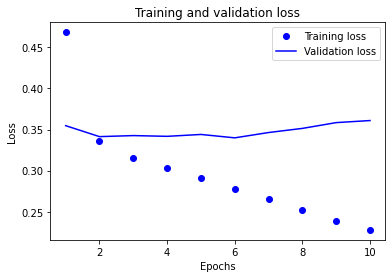

In [42]:
# loss 그래프

plt.plot(epochs, loss, 'bo', label='Training loss') # "bo"는 "파란색 점"
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b는 "파란 실선"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

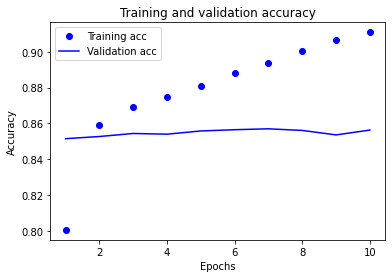

In [43]:
# accuracy 그래프

plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc') # "bo"는 "파란색 점"
plt.plot(epochs, val_acc, 'b', label='Validation acc') # b는 "파란 실선"
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 4-2. 모델 쌓기_CNN

In [44]:
# CNN

CNN = keras.Sequential()
CNN.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
CNN.add(keras.layers.Conv1D(16, 7, activation='relu'))
CNN.add(keras.layers.MaxPooling1D(5))
CNN.add(keras.layers.Conv1D(16, 7, activation='relu'))
CNN.add(keras.layers.GlobalMaxPooling1D())
CNN.add(keras.layers.Dense(8, activation='relu'))
CNN.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          3600      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [45]:
CNN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_CNN = CNN.fit(partial_X_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
266/266 [==============================] - 21s 6ms/step - loss: 0.4591 - accuracy: 0.7818 - val_loss: 0.3475 - val_accuracy: 0.8463
Epoch 2/10
266/266 [==============================] - 1s 5ms/step - loss: 0.3175 - accuracy: 0.8655 - val_loss: 0.3298 - val_accuracy: 0.8536
Epoch 3/10
266/266 [==============================] - 1s 5ms/step - loss: 0.2787 - accuracy: 0.8859 - val_loss: 0.3311 - val_accuracy: 0.8534
Epoch 4/10
266/266 [==============================] - 1s 5ms/step - loss: 0.2415 - accuracy: 0.9041 - val_loss: 0.3400 - val_accuracy: 0.8567
Epoch 5/10
266/266 [==============================] - 1s 5ms/step - loss: 0.1995 - accuracy: 0.9249 - val_loss: 0.3684 - val_accuracy: 0.8516
Epoch 6/10
266/266 [==============================] - 1s 5ms/step - loss: 0.1570 - accuracy: 0.9445 - val_loss: 0.4050 - val_accuracy: 0.8476
Epoch 7/10
266/266 [==============================] - 1s 5ms/step - loss: 0.1199 - accuracy: 0.9602 - val_loss: 0.4607 - val_accuracy: 0.8438
Epoch

In [49]:
history_CNN_dict = history_CNN.history

acc = history_CNN_dict['accuracy']
val_acc = history_CNN_dict['val_accuracy']
loss = history_CNN_dict['loss']
val_loss = history_CNN_dict['val_loss']

epochs = range(1, len(acc) + 1)

print('done')

done


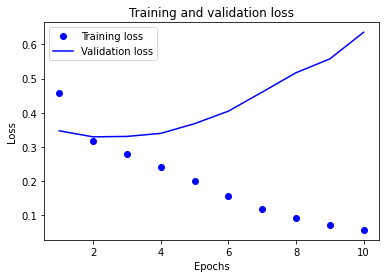

In [50]:
# loss 그래프

plt.plot(epochs, loss, 'bo', label='Training loss') # "bo"는 "파란색 점"
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b는 "파란 실선"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

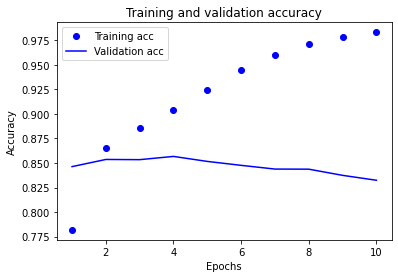

In [48]:
# accuracy 그래프

plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc') # "bo"는 "파란색 점"
plt.plot(epochs, val_acc, 'b', label='Validation acc') # b는 "파란 실선"
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 4-3. 모델 쌓기_globalmaxpooling()

In [51]:
# GlobalMaxPooling

GMP = keras.Sequential()
GMP.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
GMP.add(keras.layers.GlobalMaxPooling1D())
GMP.add(keras.layers.Dense(8, activation='relu'))
GMP.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

GMP.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 320,273
Trainable params: 320,273
Non-trainable params: 0
_________________________________________________________________


In [52]:
GMP.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_GMP = GMP.fit(partial_X_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
266/266 [==============================] - 1s 4ms/step - loss: 0.5425 - accuracy: 0.7529 - val_loss: 0.3777 - val_accuracy: 0.8333
Epoch 2/10
266/266 [==============================] - 1s 3ms/step - loss: 0.3469 - accuracy: 0.8504 - val_loss: 0.3415 - val_accuracy: 0.8486
Epoch 3/10
266/266 [==============================] - 1s 3ms/step - loss: 0.3047 - accuracy: 0.8717 - val_loss: 0.3372 - val_accuracy: 0.8527
Epoch 4/10
266/266 [==============================] - 1s 3ms/step - loss: 0.2778 - accuracy: 0.8852 - val_loss: 0.3403 - val_accuracy: 0.8513
Epoch 5/10
266/266 [==============================] - 1s 3ms/step - loss: 0.2563 - accuracy: 0.8961 - val_loss: 0.3478 - val_accuracy: 0.8491
Epoch 6/10
266/266 [==============================] - 1s 3ms/step - loss: 0.2379 - accuracy: 0.9047 - val_loss: 0.3580 - val_accuracy: 0.8473
Epoch 7/10
266/266 [==============================] - 1s 3ms/step - loss: 0.2209 - accuracy: 0.9125 - val_loss: 0.3696 - val_accuracy: 0.8472
Epoch 

In [53]:
history_GMP_dict = history_GMP.history

acc = history_GMP_dict['accuracy']
val_acc = history_GMP_dict['val_accuracy']
loss = history_GMP_dict['loss']
val_loss = history_GMP_dict['val_loss']

epochs = range(1, len(acc) + 1)

print('done')

done


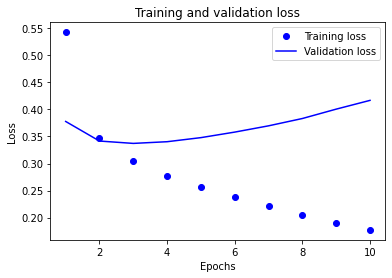

In [54]:
# loss 그래프

plt.plot(epochs, loss, 'bo', label='Training loss') # "bo"는 "파란색 점"
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b는 "파란 실선"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

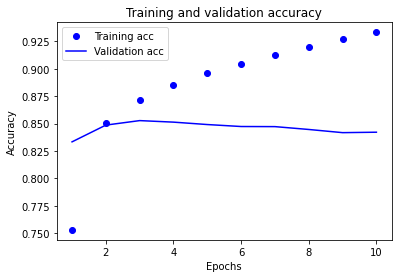

In [55]:
# accuracy 그래프

plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc') # "bo"는 "파란색 점"
plt.plot(epochs, val_acc, 'b', label='Validation acc') # b는 "파란 실선"
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 5. 모델 구성 및 validation set 구성

In [ ]:
모델은 3가지 이상 다양하게 구성하여 실험해 보세요.

# 6. 모델 훈련 개시

# 7. Loss, Accuracy 그래프 시각화

# 8. 학습된 Embedding 레이어 분석

# 9. 한국어 Word2Vec 임베딩 활용하여 성능 개선

In [ ]:
한국어 Word2Vec은 /data 폴더 안에 있는 word2vec_ko.model을 활용하세요.
한국어 Word2Vec을 활용할 때는 load_word2vec_format() 형태가 아닌 load() 형태로 모델을 불러와주세요. 
또한 모델을 활용할 때에는 아래 예시와 같이 .wv를 붙여서 활용합니다. 좀더 자세한 활용법에 대해선 다음 링크들을 참조해주세요.

In [56]:
from gensim.models import Word2Vec

# Load the Word2Vec model
model = Word2Vec.load('word2vec_ko.model')  # Replace 'word2vec_ko.model' with the actual path to your model file

# Find similar words to "love"
similar_words = model.wv.most_similar('love')

# Print the similar words and their similarity scores
for word, similarity in similar_words:
    print(word, similarity)


FileNotFoundError: [Errno 2] No such file or directory: 'word2vec_ko.model'

In [58]:
from gensim.models import Word2Vec

# Load the Word2Vec model
model = Word2Vec.load('data/word2vec_ko.model')  # Replace 'word2vec_ko.model' with the actual path to your model file

# Find similar words to "love"
similar_words = model.wv.most_similar('love')

# Print the similar words and their similarity scores
for word, similarity in similar_words:
    print(word, similarity)


FileNotFoundError: [Errno 2] No such file or directory: 'data/word2vec_ko.model'

# baseline

# 3. 탐구 및 시도 모음

### import gemsim에 대해서

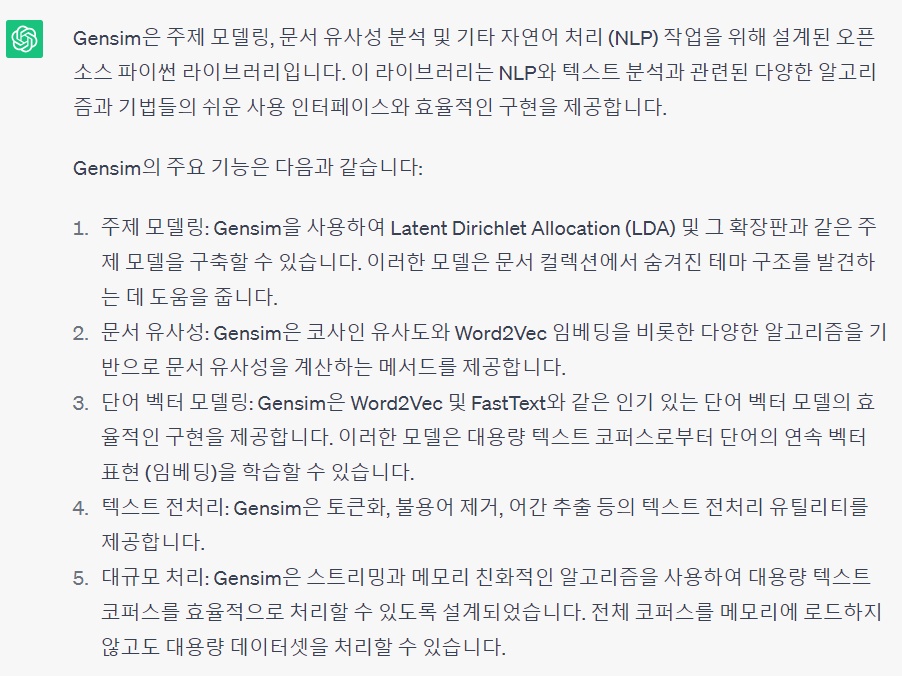

In [3]:
Image("[GD_5_Movie Review] images/06.PNG")

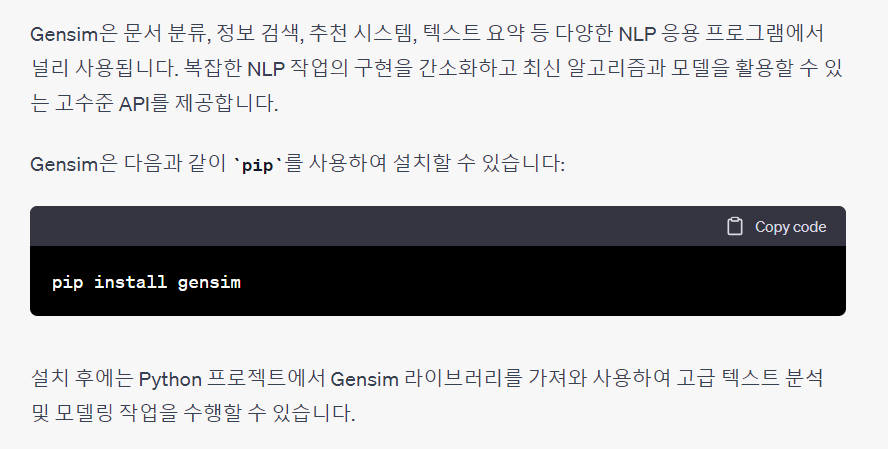

In [4]:
Image("[GD_5_Movie Review] images/07.PNG")

### f-string 쓰는 방법 정리하기

In [ ]:
print("훈련 샘플 개수: {}, 테스트 개수: {}".format(len(train_data), len(test_data)))

# 5. 루브릭 기준

1. 다양한 방법으로 Text Classification 태스크를 성공적으로 구현하였다.
3가지 이상의 모델이 성공적으로 시도됨

2. gensim을 활용하여 자체학습된 혹은 사전학습된 임베딩 레이어를 분석하였다.
gensim의 유사단어 찾기를 활용하여 자체학습한 임베딩과 사전학습 임베딩을 비교 분석함

3. 한국어 Word2Vec을 활용하여 가시적인 성능향상을 달성했다.
네이버 영화리뷰 데이터 감성분석 정확도를 85% 이상 달성함
    
    
    
    

# 7. References

KoNLPy 공식 웹사이트
https://konlpy.org/ko/latest/index.html

gensim 공식 웹사이트
https://pypi.org/project/gensim/

딕셔너리 items()
https://devpouch.tistory.com/75

딕셔너리에서 values 값 보기
https://wikidocs.net/16#key-value

.join()
https://blockdmask.tistory.com/468